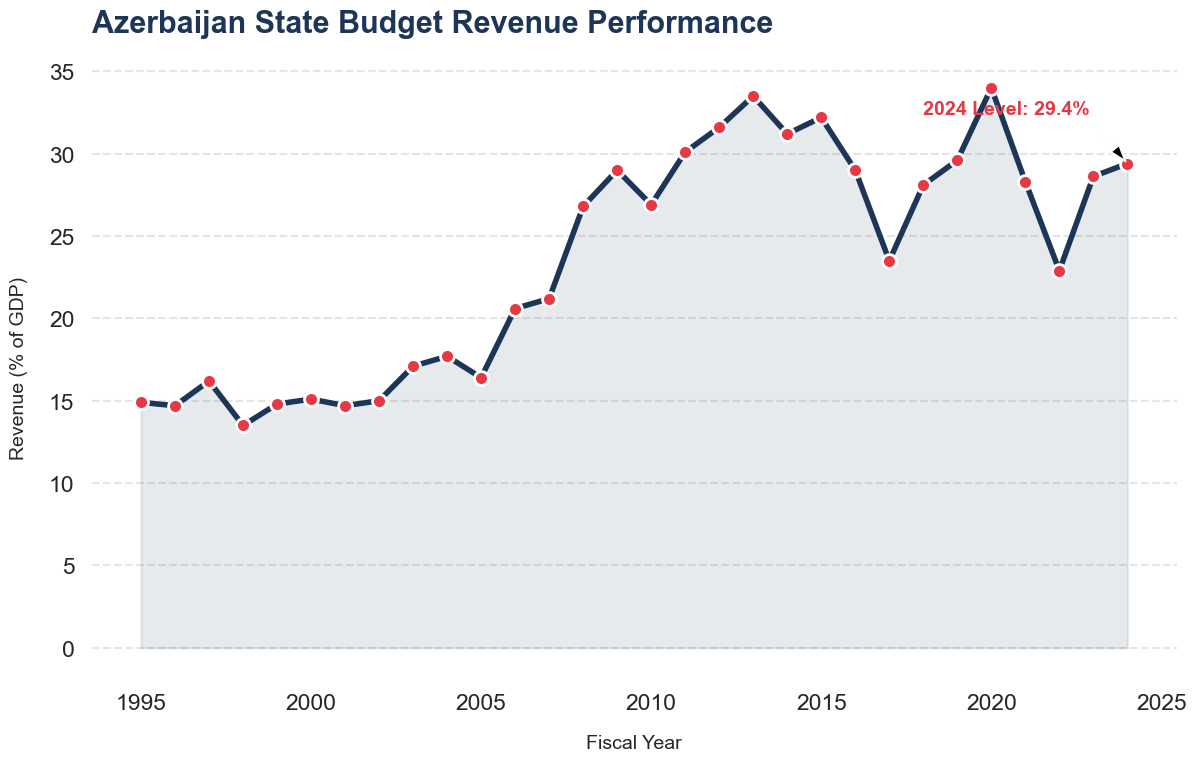

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

df = pd.read_csv('budget_data.csv')
for col in df.columns:
    if col != 'Year':
        df[col] = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')

df = df.sort_values('Year')


df = pd.read_csv('budget_data.csv').sort_values('Year')
y_col = 'State budget revenues (percentage)'
sns.set_context("talk")
plt.figure(figsize=(14, 8))
sns.set_style("white")
plt.fill_between(df['Year'], df[y_col], color='#1d3557', alpha=0.1)
sns.lineplot(data=df, x='Year', y=y_col,
             color='#1d3557', linewidth=4,
             marker='o', markersize=10,
             markerfacecolor='#e63946', markeredgewidth=2, markeredgecolor='white')
last_year = df['Year'].max()
last_val = df[df['Year'] == last_year][y_col].values[0]
plt.annotate(f'2024 Level: {last_val}%',
             xy=(last_year, last_val),
             xytext=(last_year - 6, last_val + 3),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=14, fontweight='bold', color='#e63946')
plt.title("Azerbaijan State Budget Revenue Performance", fontsize=22, fontweight='bold', loc='left', color='#1d3557', pad=20)
plt.xlabel('Fiscal Year', fontsize=14, labelpad=15)
plt.ylabel('Revenue (% of GDP)', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

This chart illustrates the fiscal trajectory of Azerbaijan’s state budget revenue as a share of GDP(Gross Domestic Product) from 1995 to 2024, highlighting a long-term expansion from roughly 10% in the mid-90s to a stabilized range around 29.4% today. The visualization captures critical economic shifts, most notably the significant 2020 peak caused by the relative contraction of GDP during the global pandemic, followed by a resilient recovery into 2024. By utilizing a high-contrast aesthetic with a shaded area and annotated markers, the chart effectively communicates the government's increasing fiscal capacity and its success in maintaining a consistent revenue base despite global market volatility.

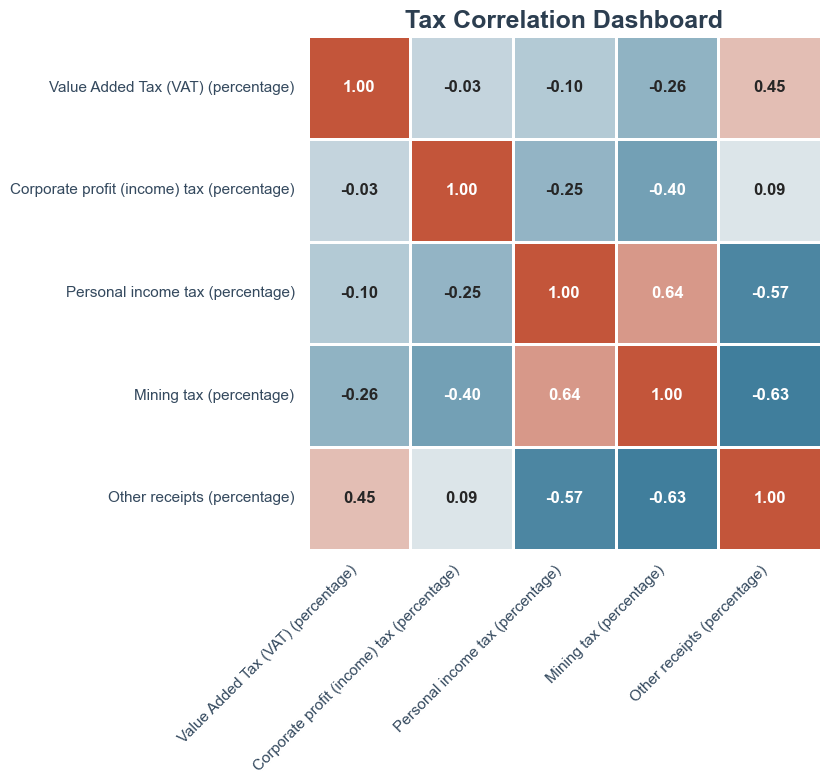

In [42]:
df_numeric = df[plot_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=2,
    cbar=False,
    square=True,
    annot_kws={"size": 12, "weight": "bold"}
)
plt.title('Tax Correlation Dashboard', fontsize=18, fontweight='bold', color='#2c3e50')
plt.xticks(rotation=45, ha='right', color='#34495e')
plt.yticks(color='#34495e')
plt.tight_layout()
plt.show()

This map shows which taxes move in the same direction. The red sections reveal that major revenues, like VAT and Income Tax, are closely linked; when the economy is doing well, these taxes usually rise together. On the other hand, taxes like the Mining Tax act differently because they depend on global market prices rather than local spending. This helps us see that while the core of the budget is stable and connected, some parts are more affected by outside world events.

In [38]:
major_taxes = [
    'VAT (%)', 'Corporate Profit Tax (%)',
    'Personal Income Tax (%)', 'Mining tax (%)', 'Other receipts (%)'
]
plot_cols = ['Value Added Tax (VAT) (percentage)', 'Corporate profit (income) tax (percentage)',
             'Personal income tax (percentage)', 'Mining tax (percentage)', 'Other receipts (percentage)']
df_long = df.melt(id_vars='Year', value_vars=plot_cols, var_name='Tax Source', value_name='% of GDP')
fig_area = px.area(df_long, x="Year", y="% of GDP", color="Tax Source",
                   title="<b>The Evolution of Azerbaijan's Budget Composition</b>",
                   template="plotly_white",
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig_area.show()

This chart shows how Azerbaijan’s total budget is built from different sources, like VAT and corporate taxes. Because the colors are stacked on top of each other, you can easily see which parts of the budget are growing and which are shrinking over time. It helps us understand which types of taxes are the most important for the country's income and how that balance has shifted since 1995.

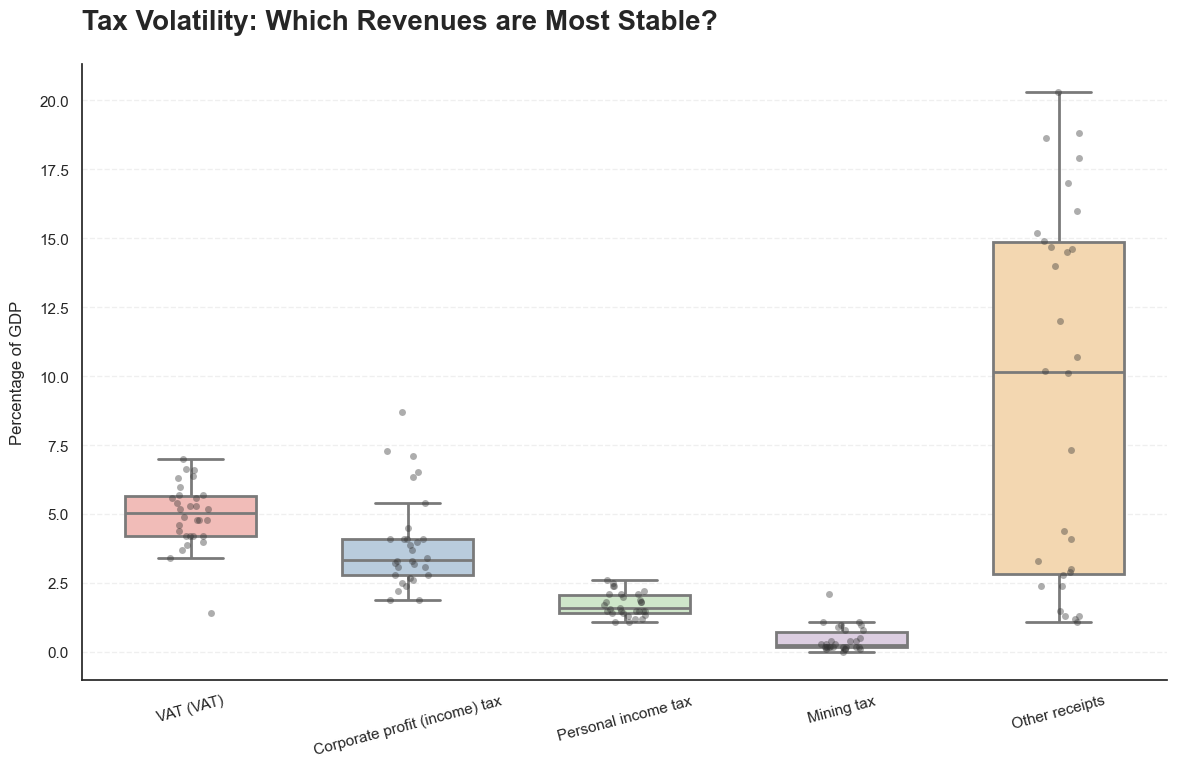

In [39]:
plt.figure(figsize=(14, 8))
sns.set_style("white")
ax = sns.boxplot(data=df[plot_cols],
                 palette="Pastel1",
                 fliersize=0,
                 linewidth=2,
                 width=0.6)
sns.stripplot(data=df[plot_cols],
              color="#333333",
              size=5,
              alpha=0.4,
              jitter=True)
plt.title('Tax Volatility: Which Revenues are Most Stable?', fontsize=20, fontweight='bold', pad=25, loc='left')
plt.ylabel('Percentage of GDP', fontsize=12, labelpad=10)
ax.set_xticks(range(len(plot_cols)))
short_names = [col.replace(' (percentage)', '').replace('Value Added Tax', 'VAT') for col in plot_cols]
ax.set_xticklabels(short_names, rotation=15, fontsize=11)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

This chart shows how much different tax types change from year to year. The boxes show where the tax levels usually stay, while the individual dots show every year since 1995. If a box is "short" (like Personal Income Tax), it means that tax is very stable and reliable. If a box is "tall" or has dots spread far apart (like Other Receipts), it means that revenue source is volatile and can change a lot depending on the economy. This helps the government decide which taxes they can rely on for long-term planning.

In [43]:
clean_labels = [col.replace(' (percentage)', '').replace('Value Added Tax ', '') for col in plot_cols]
latest_data = df[df['Year'] == 2024][plot_cols].iloc[0].values
fig_pie = go.Figure(data=[go.Pie(
    labels=clean_labels,
    values=latest_data,
    hole=.5,
    pull=[0.05, 0, 0, 0, 0],
    marker=dict(colors=px.colors.qualitative.Prism, line=dict(color='#FFFFFF', width=2)),
    textinfo='percent+label',
    hoverinfo='label+value+percent',
    textposition='outside'
)])
fig_pie.update_layout(
    title=dict(
        text="<b>2024 Revenue Structure</b><br><span style='font-size:14px; color:gray;'>Distribution of State Budget Income Sources</span>",
        x=0.5,
        xanchor='center'
    ),
    annotations=[dict(text='2024<br>Budget', x=0.5, y=0.5, font_size=20, showarrow=False, font_family="Arial Black")],
    showlegend=False,
    margin=dict(t=100, b=50, l=50, r=50),
    template='plotly_white'
)
fig_pie.show()

This donut chart shows exactly where Azerbaijan's budget money comes from in 2024. Instead of just a list of numbers, this visual makes it clear that a few main sources, like VAT and Corporate Tax, provide the biggest pieces of the pie. The "hole" in the middle allows us to focus on the current year, while the slices that sit slightly outside the circle point out the most important contributors. It's a quick way for anyone to see how the government funds its projects today .